In [23]:
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
from sklearn.preprocessing import Normalizer, normalize
import numpy as np

In [24]:
Person = 'C'
X = [10, 25, 50, 100, 200, 500]
data_list = []
length_list = []
temp_data = []
for x in X:
    temp_list = []
    data = pd.read_csv(f'data/{Person}{x}_fileter.csv')
    sum = data['Marker'].value_counts()
    for i in range(len(sum.values)):
        if sum.values[i] == 1:
            temp_list.append(sum.index[i])
    data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2


    length_list.append(len(data)) # 数据长度存放在这里

    temp_data.extend(data['Height'].values) # 所有的数据存放在这里

# 所有数据正则化
norm_data = Normalizer(norm='max').fit_transform(np.array(temp_data, dtype='float32').reshape(1, -1))
    # data_list.append(norm_data)
x10 = norm_data[0][0:length_list[0]]
x25 = norm_data[0][length_list[0]:length_list[0]+length_list[1]]
x50 = norm_data[0][length_list[0]+length_list[1]:length_list[0]+length_list[1]+length_list[2]]
x100 = norm_data[0][length_list[0]+length_list[1]+length_list[2]:length_list[0]+length_list[1]+length_list[2]+length_list[3]]
x200 = norm_data[0][length_list[0]+length_list[1]+length_list[2]+length_list[3]:length_list[0]+length_list[1]+length_list[2]+length_list[3]+length_list[4]]
x500 = norm_data[0][length_list[0]+length_list[1]+length_list[2]+length_list[3]+length_list[4]:length_list[0]+length_list[1]+length_list[2]+length_list[3]+length_list[4]+length_list[5]]


/tmp/ipykernel_205444/1581447866.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2
/tmp/ipykernel_205444/1581447866.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2
/tmp/ipykernel_205444/1581447866.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

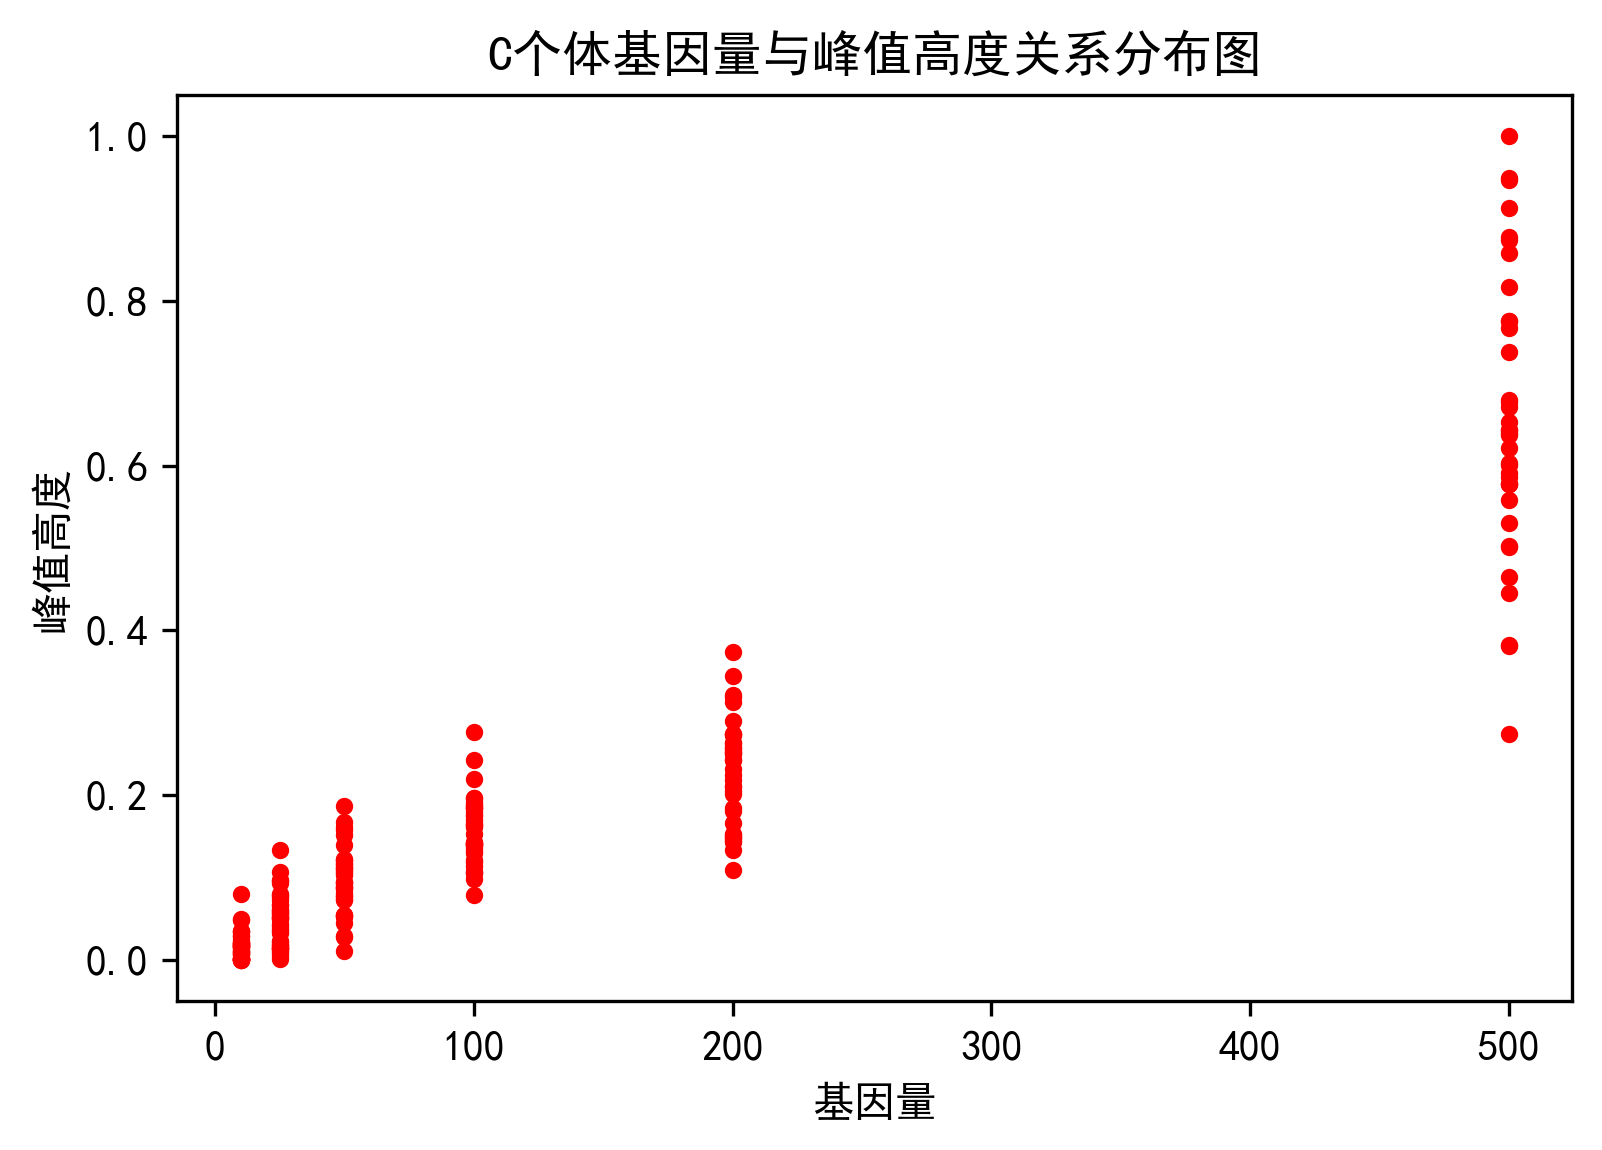

In [25]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif' #解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=300)
plt.title(f'{Person}个体基因量与峰值高度关系分布图')
plt.xlabel('基因量')
plt.ylabel('峰值高度')

plt.scatter([10 for _ in range(len(x10))], x10, color='red', s=10)
plt.scatter([25 for _ in range(len(x25))], x25, color='red', s=10)
plt.scatter([50 for _ in range(len(x50))], x50, color='red', s=10)
plt.scatter([100 for _ in range(len(x100))], x100, color='red', s=10)
plt.scatter([200 for _ in range(len(x200))], x200, color='red', s=10)
plt.scatter([500 for _ in range(len(x500))], x500, color='red', s=10)

with open(f'img/allRe{Person}.png','wb') as f:  
    plt.savefig(f, format='png', dpi=300)